## 1.Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.options.display.max_columns=None

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## 2.Loading the Dataset

In [8]:
df_forest=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/forestcover/covtype.csv')
df_forest.shape

(581012, 55)

## 3.Exploratory Data Analysis

In [9]:
df_forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [10]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [11]:
#Feature Engineering

From the table and dataset, we can find that there are two features, 'Soil_Type' and 'Wilderness_Area' which are one hot encoded. To understand the data better for our data analysis, let's convert it back to original form uisng idxmax.

In [12]:
### Soil_Type

In [13]:
###Slicing out the one hot encoded columns

In [14]:
df1=df_forest.iloc[:,14:54]
df1.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df1['Soil_Type']=df1.idxmax(1)

In [16]:
df1.head() #Checking for the added column

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Soil_Type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Soil_Type29
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Soil_Type29
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Soil_Type12
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Soil_Type30
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Soil_Type29


Now we will slice the particular 'Soil_Type' column from this df1 dataframe and add it back to our original dataset.

In [17]:
df1=df1.loc[:,'Soil_Type']

In [18]:
df_forest['Soil_Type']=df1

In [19]:
df_forest.head() ## Checking for the added column

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29


Let's do the same for 'Wilderness_Area' column.

In [20]:
df2=df_forest.iloc[:,10:14]
df2.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [21]:
df2['Wilderness_Area']=df2.idxmax(1)

In [22]:
df2.head() #Checking for the added column

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Wilderness_Area
0,1,0,0,0,Wilderness_Area1
1,1,0,0,0,Wilderness_Area1
2,1,0,0,0,Wilderness_Area1
3,1,0,0,0,Wilderness_Area1
4,1,0,0,0,Wilderness_Area1


Let's slice the 'Wilderness_Area' column from df2 and add it back to our original dataset.

In [23]:
df2=df2.loc[:,'Wilderness_Area']

In [24]:
df_forest['Wilderness_Area']=df2

Now checking our datastet for these added columns.

In [25]:
df_forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Soil_Type12,Wilderness_Area1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,Soil_Type30,Wilderness_Area1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1


Now, if we check the data type of both these columns, they will be object, which have to dummy encoded again while model building. Post dummy encoding, new columns with complex names will be created. For eg. 1st entry will get converted to 'Soil_Type_Soil_Type29' column, which will be difficult for us to understand and handle. Let's resolve this issue by splitting the string and considering only the digits part. 

In [26]:
df_forest.dtypes[['Soil_Type','Wilderness_Area']]

Soil_Type          object
Wilderness_Area    object
dtype: object

In [27]:
def str_split(x):
    return re.findall('(\d+|[A-Za-z_]+)',x)

In [28]:
df_forest['Soil_Type']=df_forest['Soil_Type'].apply(lambda x:str_split(x)).apply(lambda x:int(x[-1]))

In [29]:
df_forest['Wilderness_Area']=df_forest['Wilderness_Area'].apply(lambda x:str_split(x)).apply(lambda x:int(x[-1]))

Let's check our dataset to see if the changes are incorporated.

In [30]:
df_forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,29,1


We have got the required columns added to the dataset. Now let's drop the columns which we would not require for building the model.

In [31]:
df_forest=df_forest.drop(df_forest.iloc[:,10:54],axis=1)

In [32]:
df_forest.shape

(581012, 13)

In [33]:
df_forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


Now, we have got the required dataset with required columns.

From the shape of the dataset, we can see that the original dataset has 581012 rows. This is a large dataset which may require more time for the models to execute. For the sake of simplification,let's take a sample of this data for our analysis. Now, the easiest way to do so is to take a random sample, but it may give biased results, if our data is not balanced. Let's check our target column, to see if our data is balanced or not.

In [34]:
#Checking the target column and plotting the same

In [35]:
df_forest.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

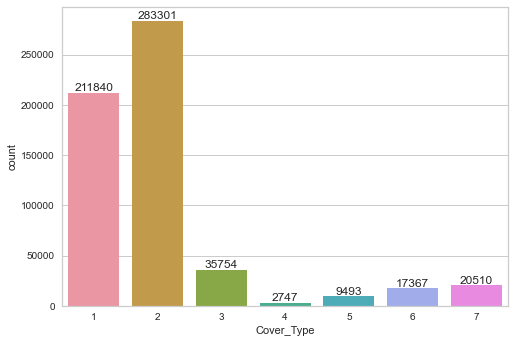

In [36]:
cp=sns.countplot(x='Cover_Type',data=df_forest)
cp.bar_label(cp.containers[0])
plt.show()

We can see that the classes are not balanced. In this case, if we take random sample, there are high chances that the new resulting dataset will be biased towards the dominant category. So, to resolve this, let's use Proportionate Stratified Sampling method to get our required dataset of 174303 rows (30% of total data)

In [37]:
df_forest.to_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/forestcover/forest1.csv',index=False)

In [38]:
df_sample=df_forest.groupby('Cover_Type',group_keys=False).apply(lambda x: x.sample(frac=0.30))
df_sample.shape

(174303, 13)

Now, let's check the distribution of classes in our dataset, and compare with our original dataset, if they are proportionate or not.

In [39]:
df_sample.Cover_Type.value_counts()

2    84990
1    63552
3    10726
7     6153
6     5210
5     2848
4      824
Name: Cover_Type, dtype: int64

We can see that, each class values are approximately 10% of the original class values, which means we have got a proportionate sample from our original dataset.

In [40]:
#plotting the values on a countplot

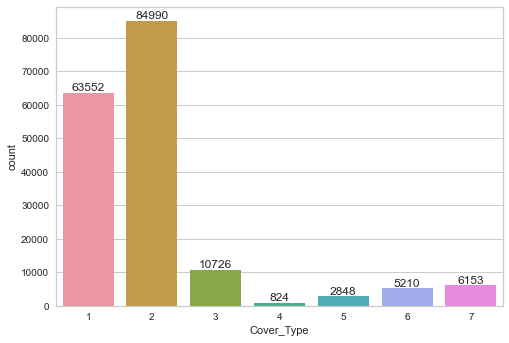

In [41]:
cp=sns.countplot(x='Cover_Type',data=df_sample)
cp.bar_label(cp.containers[0])
plt.show()

In [42]:
#Testing for Missing Values

In [43]:
df_sample.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Soil_Type                             0
Wilderness_Area                       0
dtype: int64

We can see that there are no missing values in the dataset.

In [44]:
#Summary Statistics

In [45]:
df_sample.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
count,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000
mean,2959.223450,155.442895,14.098059,269.295933,46.638394,2351.464737,212.105099,223.312003,142.581344,1979.296598,2.051468,24.369225,2.116894
std,280.179303,111.960814,7.483219,212.880635,58.379849,1559.218309,26.776154,19.750530,38.268003,1323.903496,1.396507,9.486722,1.061708
min,1867.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1107.000000,198.000000,213.000000,119.000000,1022.000000,1.000000,20.000000,1.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,3.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,598.000000,7117.000000,254.000000,254.000000,253.000000,7141.000000,7.000000,40.000000,4.000000


In [46]:
#Plotting the box plot wrt target column

In [47]:
num_cols=df_sample.select_dtypes(include=np.number)
num_cols.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Soil_Type',
       'Wilderness_Area'],
      dtype='object')

In [48]:
columns=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type',
       'Wilderness_Area']

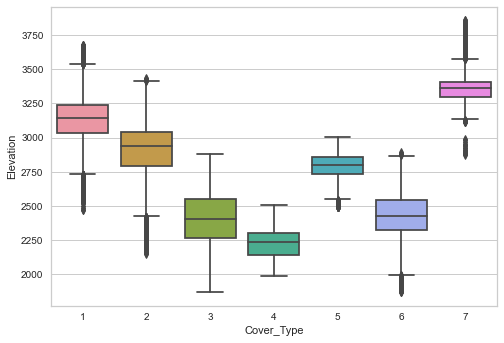

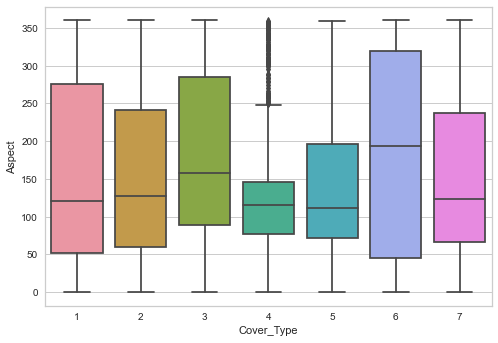

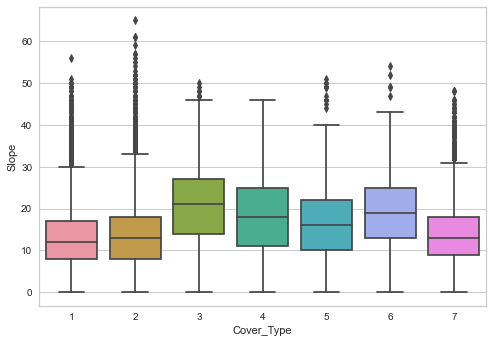

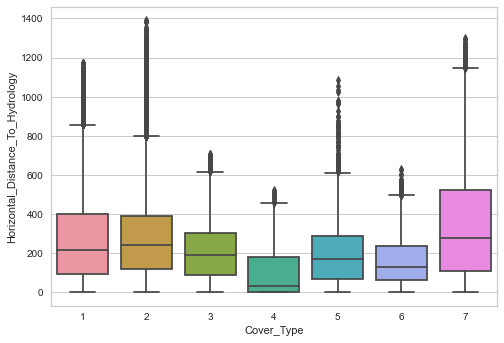

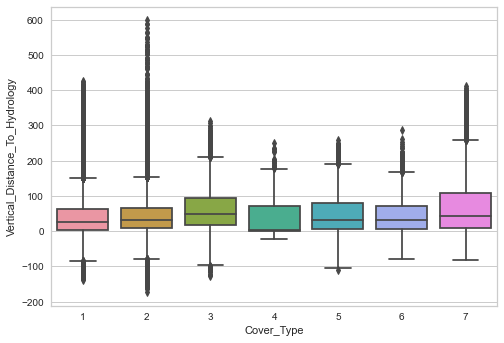

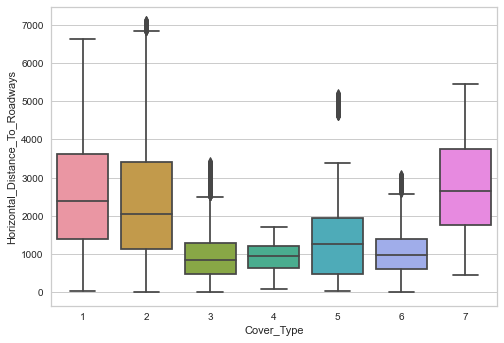

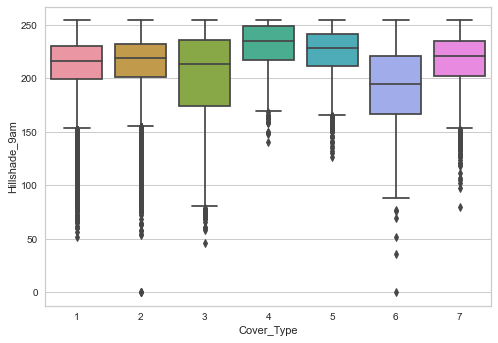

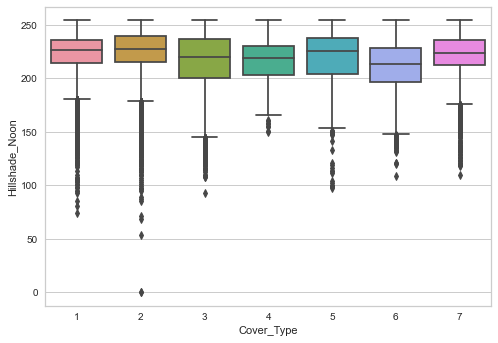

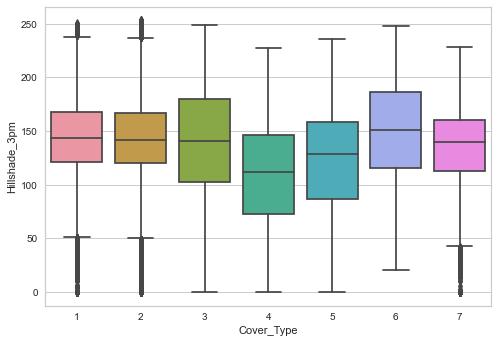

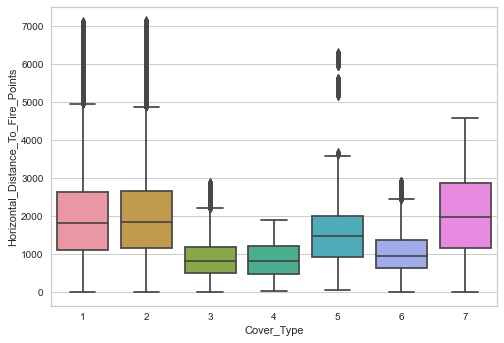

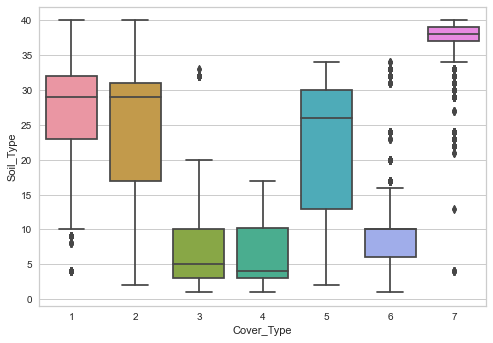

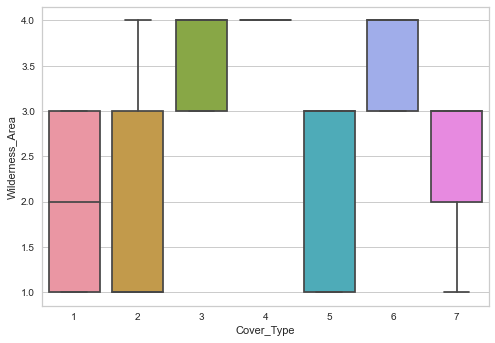

In [49]:
for col in columns:
    sns.boxplot(x='Cover_Type',y=col,data=df_sample)
    plt.show()

We can note from the plots, that for Cover_Type 7, the elevation is higher as compared to other cover types. Secondly, the vertical distance to hydrology and horizontal distance for the particulat cover type is also higher, which means the slope lower for the soil(can also be checked from the graph). We can infer that this may be a flat soil with a higher elevation. So, there will less chance for this getting affected if there is a forest fire. And since it is flat, it will be easier for the water supply to this area.

There are negative values in Vertical_Distance_to_Hydrology, which means the nearest water surface is below the data point or below the sea level.

We can also see that there are lot of outliers in categorical column, Soil_Type, which means the data is not balanced. We need to balance it using SMOTE.

In [50]:
#Treating the outliers

In [51]:
cols=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

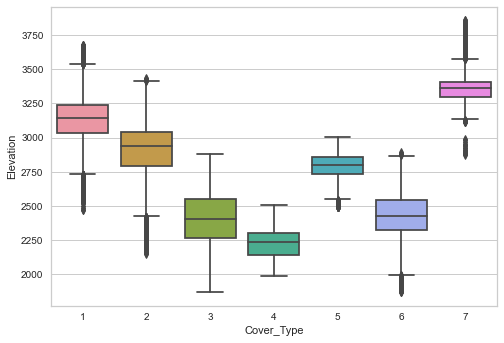

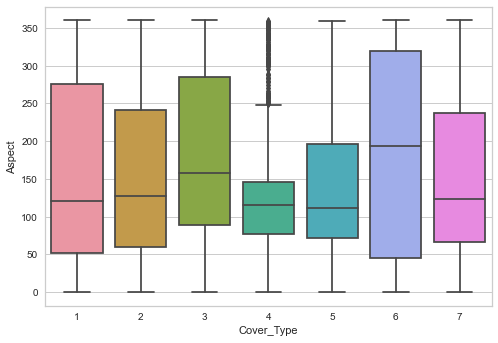

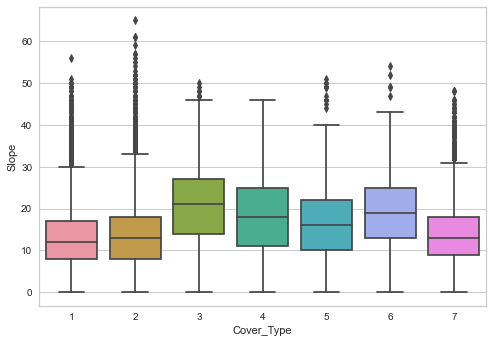

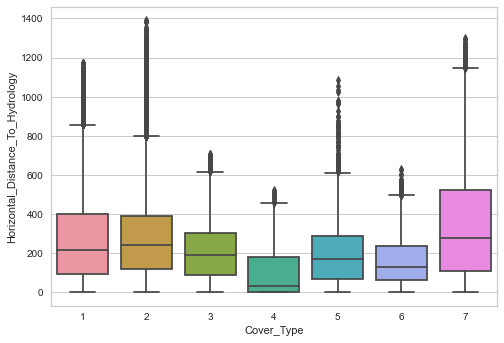

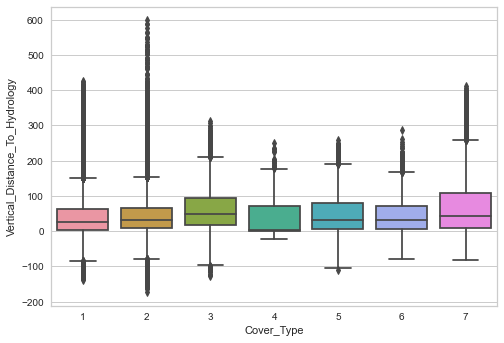

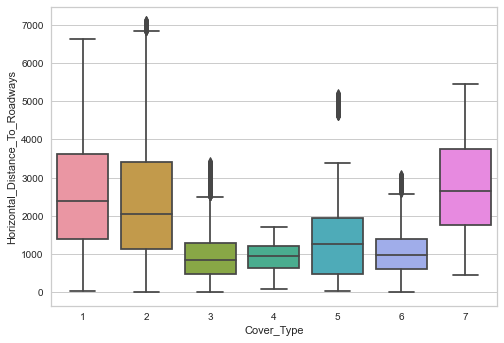

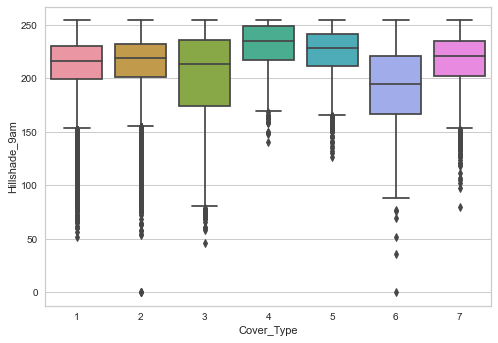

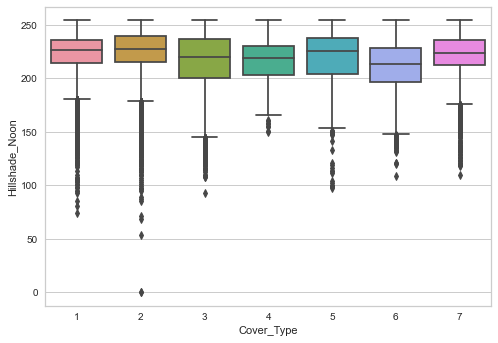

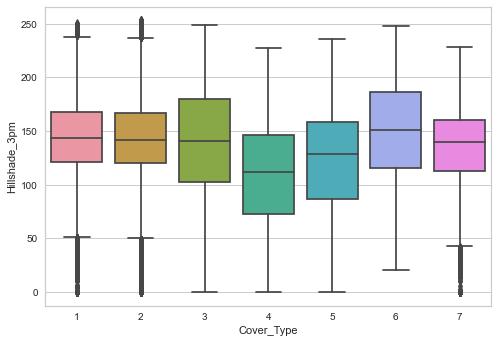

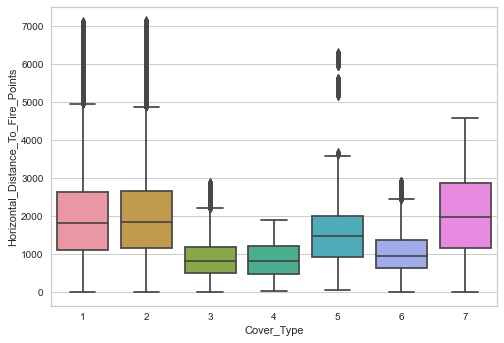

In [52]:
for col in cols:
    sns.boxplot(x='Cover_Type',y=col,data=df_sample)
    plt.show()

In [53]:
df_sample.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
count,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000,174303.000000
mean,2959.223450,155.442895,14.098059,269.295933,46.638394,2351.464737,212.105099,223.312003,142.581344,1979.296598,2.051468,24.369225,2.116894
std,280.179303,111.960814,7.483219,212.880635,58.379849,1559.218309,26.776154,19.750530,38.268003,1323.903496,1.396507,9.486722,1.061708
min,1867.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1107.000000,198.000000,213.000000,119.000000,1022.000000,1.000000,20.000000,1.000000
50%,2995.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,3.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,598.000000,7117.000000,254.000000,254.000000,253.000000,7141.000000,7.000000,40.000000,4.000000


In [54]:
#Checking for Normality

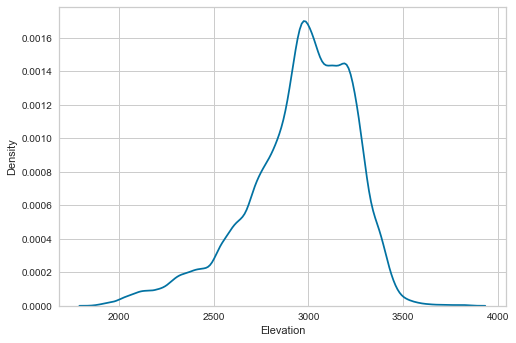

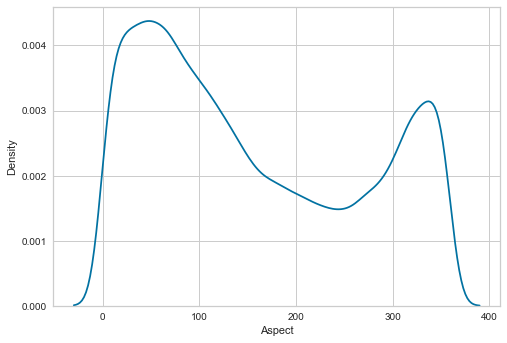

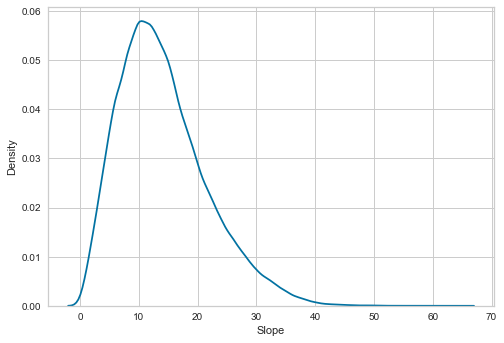

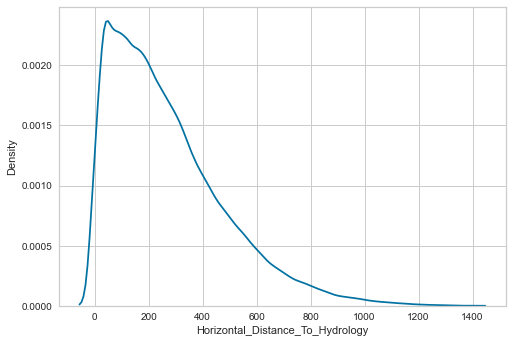

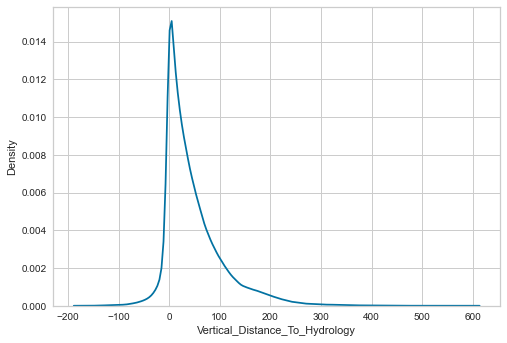

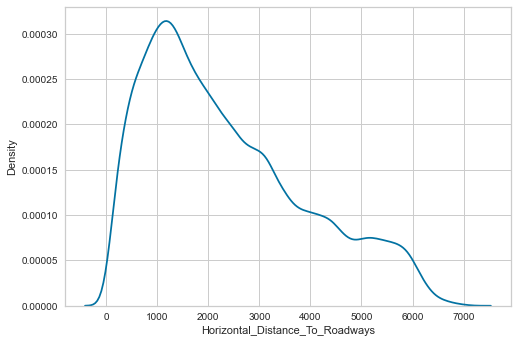

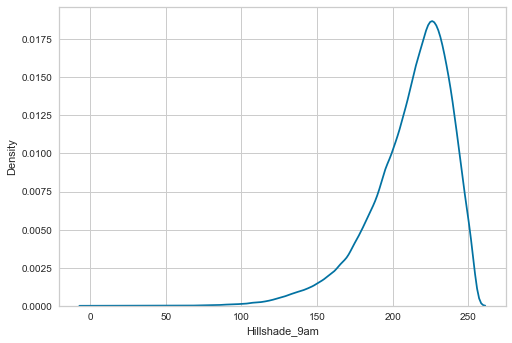

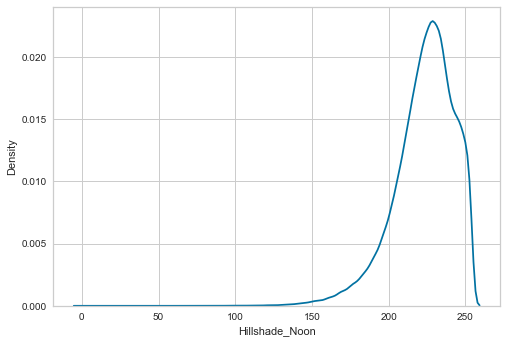

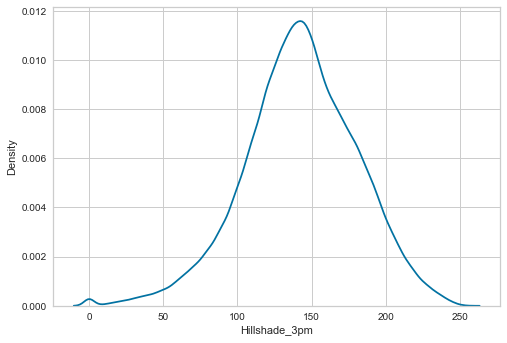

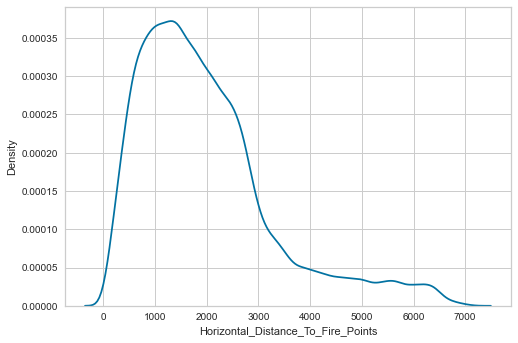

In [55]:
for col in cols:
    sns.kdeplot(x=col,data=df_sample)
    plt.show()

In [56]:
#Test for Linear Relationship

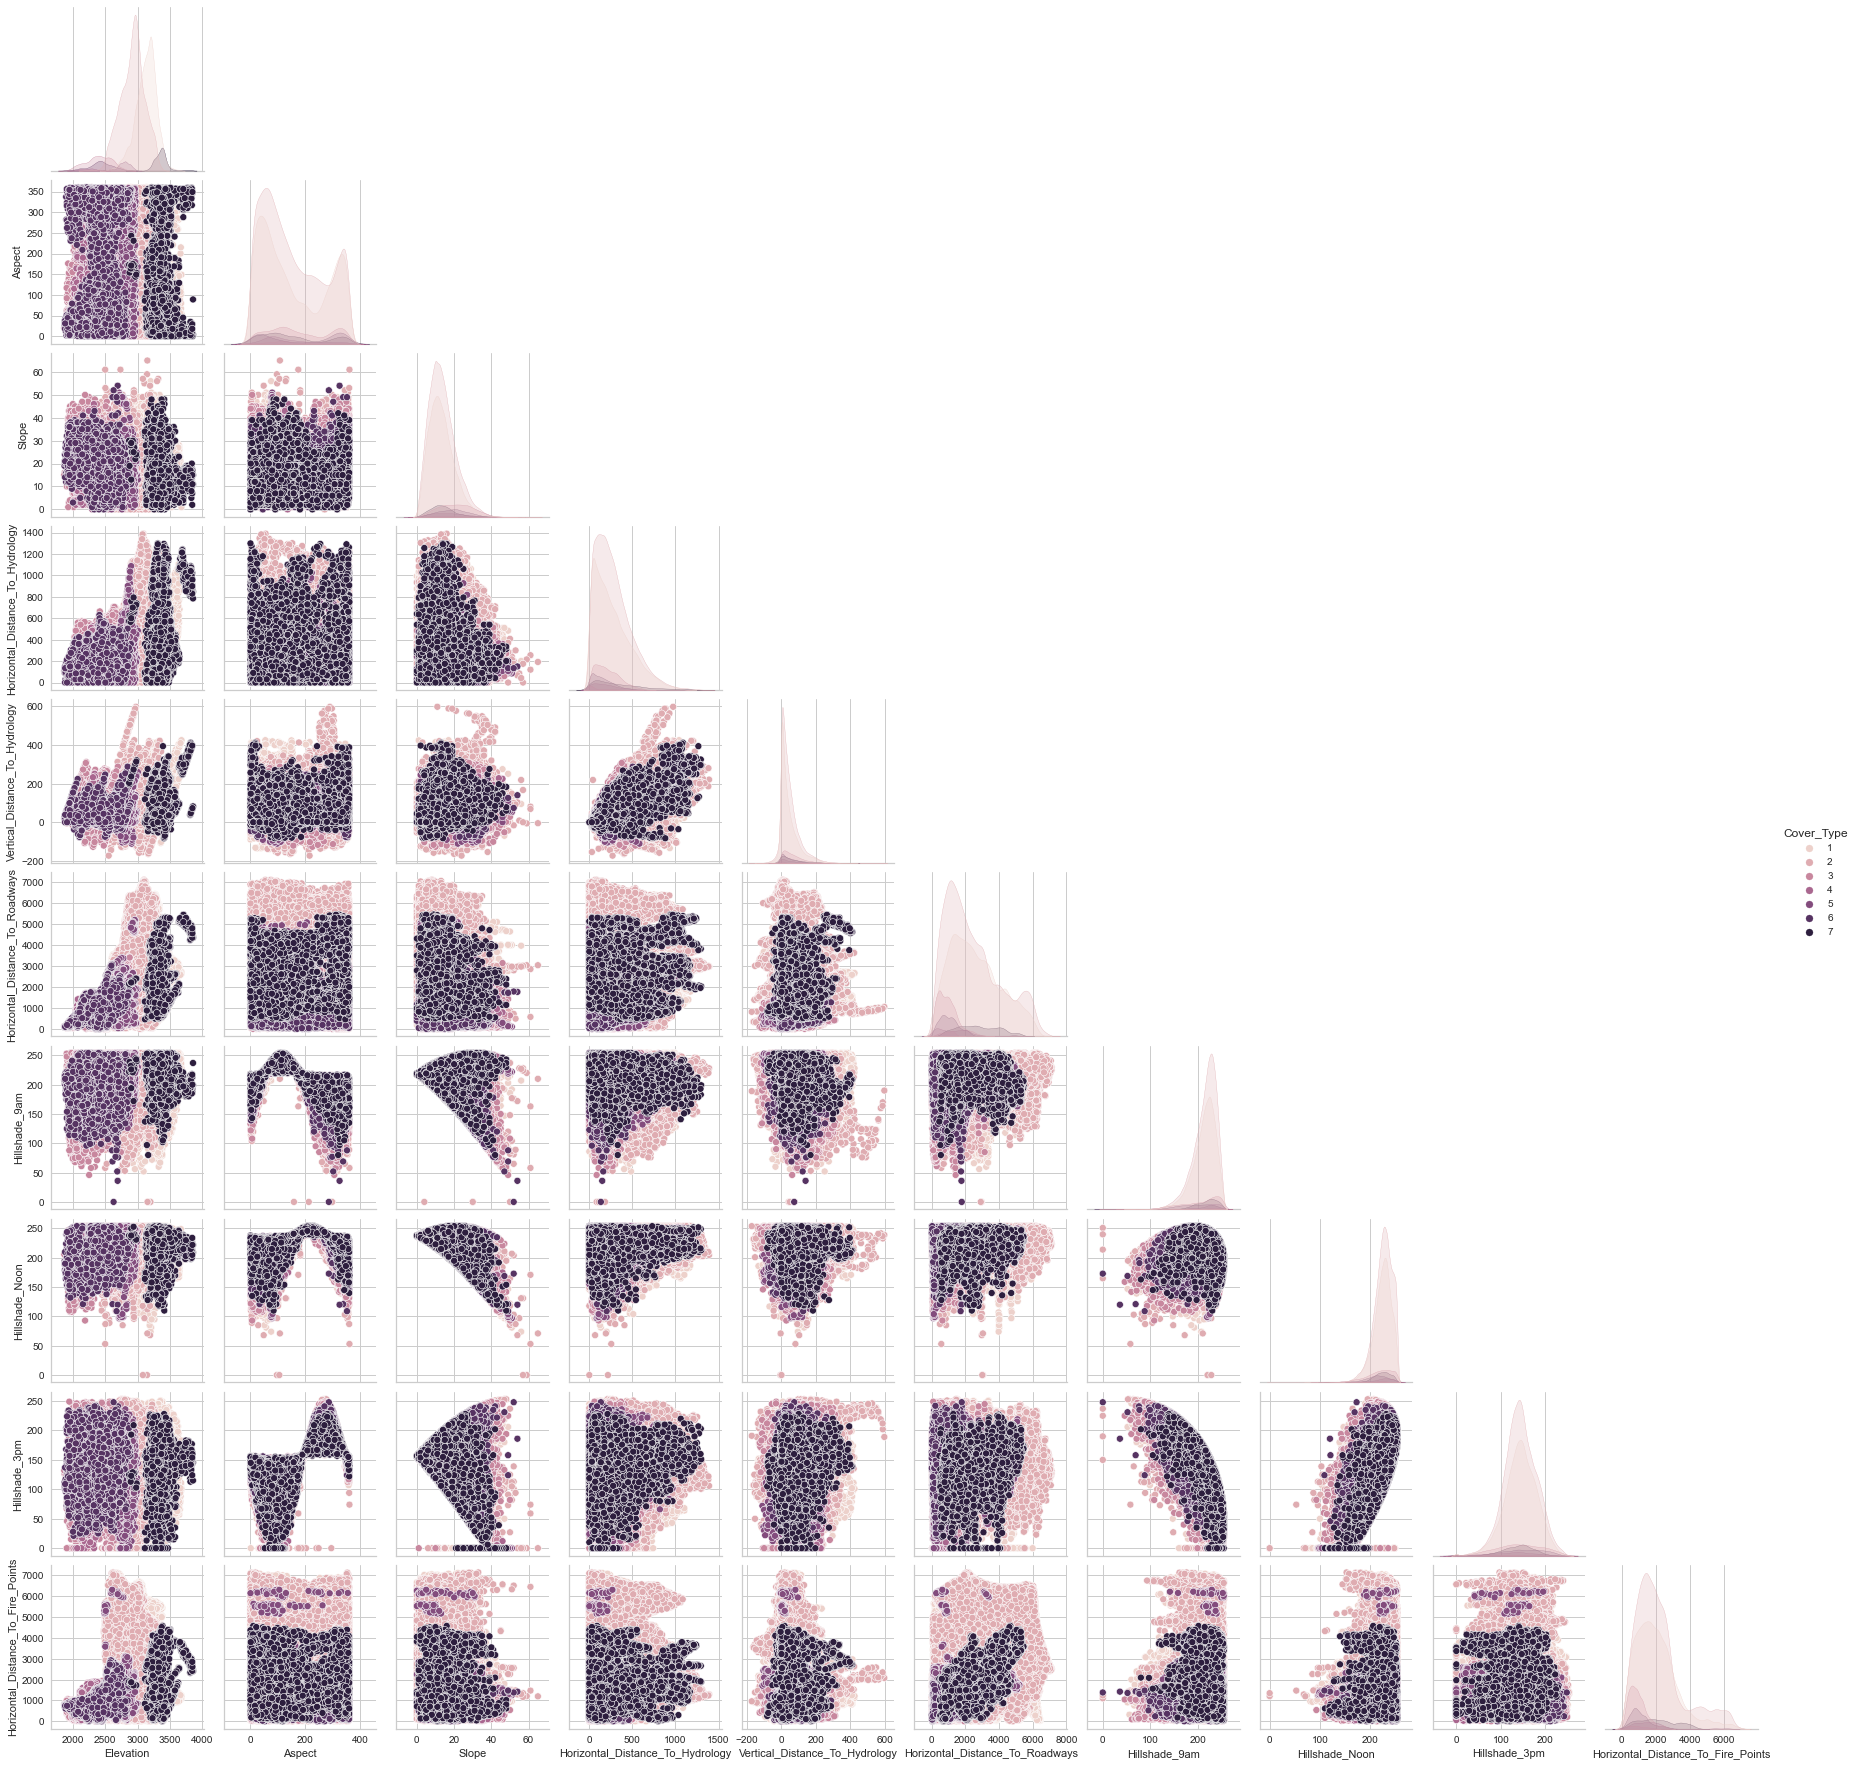

In [57]:
sns.pairplot(df_sample,vars=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],hue='Cover_Type',corner=True)
sns.color_palette('dark')
plt.show()

We can see that there is no linear relationship among the features.

In [58]:
#Testing for Correlation

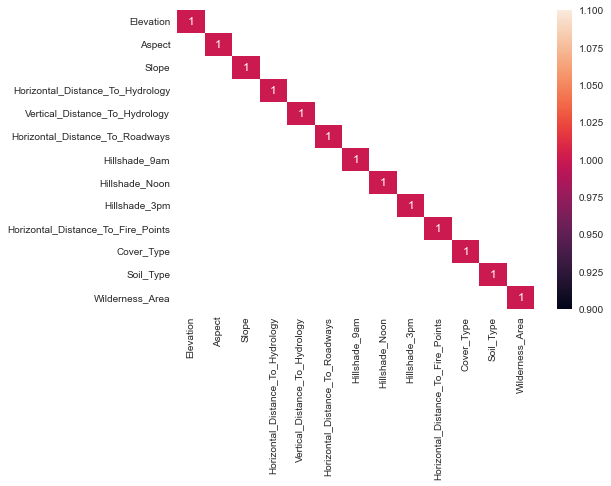

In [59]:
vcorr=df_sample.corr()

sns.heatmap(vcorr[(vcorr<-0.85) | (vcorr>0.85)],annot=True)
plt.show()

We can see that there is no strong correlation between the features.

In [60]:
#creating a file backup

df_sample1=df_sample.copy(deep=True)

In [61]:
df_sample1.to_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/forestcover/sample.csv',index=False)

In [62]:
#Dummy Encoding the target class

In [63]:
df_sample1['Cover_Type']=df_sample1['Cover_Type'].map({1:0,2:1,3:2,4:3,5:4,6:5,7:6})

In [64]:
#Separating the Independent and Dependent variables

In [65]:
X=df_sample1.drop('Cover_Type',axis=1)
y=df_sample1['Cover_Type']

In [66]:
X.shape,y.shape

((174303, 12), (174303,))

In [67]:
#Splitting into train and test data

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [69]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((130727, 12), (43576, 12), (130727,), (43576,))

In [70]:
#Balancing the classes using SMOTE

In [71]:
y_train.value_counts()

1    63774
0    47698
2     8013
6     4603
5     3888
4     2143
3      608
Name: Cover_Type, dtype: int64

In [72]:
oversample=SMOTE()

X_train,y_train=oversample.fit_resample(X_train,y_train)

In [73]:
y_train.value_counts()

1    63774
0    63774
2    63774
4    63774
6    63774
5    63774
3    63774
Name: Cover_Type, dtype: int64

We can see that the classes are balanced now.

In [74]:
#Scaling the Data

In [75]:
mn=MinMaxScaler()

X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

In [76]:
#Finding the best parameters

In [77]:
#Finding the number of k

k_values=range(3,21)
acc_score={}

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [78]:
max(acc_score.values())

0.8963190747200294

In [79]:
max(acc_score,key=acc_score.get)

3

In [80]:
#Model Building

In [81]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=3),LGBMClassifier(),CatBoostClassifier(logging_level='Silent'),XGBClassifier(dual=False),GaussianNB()]

In [83]:
for i in range(7):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

DecisionTreeClassifier(): 
Accuracy:  0.8842711584358363
Confusion Matrix: 
[[14032  1590     3     0    34     7   188]
 [ 1806 18847   130     1   266   131    35]
 [    1    77  2380    39    12   204     0]
 [    0     0    28   176     0    12     0]
 [   16   116    10     0   560     3     0]
 [    3    61   142    18     2  1096     0]
 [   96    12     0     0     0     0  1442]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     15854
           1       0.91      0.89      0.90     21216
           2       0.88      0.88      0.88      2713
           3       0.75      0.81      0.78       216
           4       0.64      0.79      0.71       705
           5       0.75      0.83      0.79      1322
           6       0.87      0.93      0.90      1550

    accuracy                           0.88     43576
   macro avg       0.81      0.86      0.83     43576
weighted avg       0.89      0.88      0.8

We can see that Random Forest Model has performed the best with an accuracy of 93% and recall scores of 93%,94%,95%,85%,86%,90% and 96%.

In [84]:
df_sample2=df_sample.copy()

In [85]:
df_sample3=df_sample2.drop('Cover_Type',axis=1)

In [86]:
for k in range(2,10):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(df_sample3)
    print('The SH score for {} is {}'.format(k,silhouette_score(df_sample3,km.labels_)))

The SH score for 2 is 0.45678772722993055
The SH score for 3 is 0.4326558473722298
The SH score for 4 is 0.3356831107676261
The SH score for 5 is 0.3465397908231789
The SH score for 6 is 0.33480825729360325
The SH score for 7 is 0.3302754789193596
The SH score for 8 is 0.32587543472973596
The SH score for 9 is 0.2968668370417643


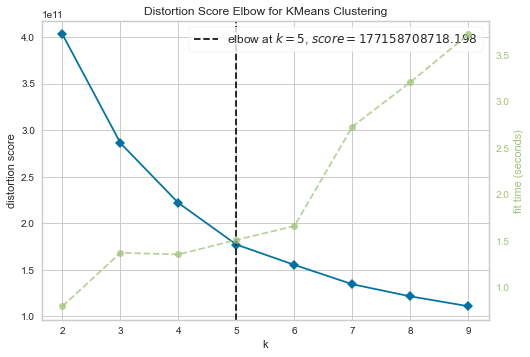

In [111]:
visualizer=KElbowVisualizer(km,k=(2,10))

visualizer.fit(df_sample3)
visualizer.show()
plt.show()

The optimum number of clusters is 5.

In [112]:
km=KMeans(n_clusters=5,random_state=1)
km.fit(df_sample3)

KMeans(n_clusters=5, random_state=1)

In [113]:
cluster_predict=km.predict(df_sample3)
cluster_predict

array([0, 0, 3, ..., 0, 2, 4])

In [114]:
np.unique(cluster_predict)

array([0, 1, 2, 3, 4])

In [115]:
def cluster(i):
    if i==0:
        i=1
    elif i==1:
        i=2
    elif i==2:
        i=3
    elif i==3:
        i=4
    else:
        i=5
    return i

In [116]:
customer_kmeans_cluster=df_sample3.copy(deep=True)
customer_kmeans_cluster['cluster']=cluster_predict

In [117]:
df_sample3['cluster']=customer_kmeans_cluster['cluster'].apply(cluster)

In [118]:
df_sample3.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,cluster,Cover_Type
234678,2470,309,10,0,0,828,193,234,181,1455,33,3,1,1
384533,3041,104,9,30,-7,1126,236,229,124,1074,29,1,1,1
97200,3119,315,11,180,33,3330,190,231,181,5020,29,1,4,1
503927,3220,49,24,488,54,830,222,179,78,1781,33,2,1,1
536814,3200,4,7,503,53,1103,211,227,153,2538,23,2,3,1


Let's add back the target column to the clustering dataset.

In [119]:
df_sample3['Cover_Type']=df_sample2['Cover_Type']

In [120]:
df_sample3.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,cluster,Cover_Type
234678,2470,309,10,0,0,828,193,234,181,1455,33,3,1,1
384533,3041,104,9,30,-7,1126,236,229,124,1074,29,1,1,1
97200,3119,315,11,180,33,3330,190,231,181,5020,29,1,4,1
503927,3220,49,24,488,54,830,222,179,78,1781,33,2,1,1
536814,3200,4,7,503,53,1103,211,227,153,2538,23,2,3,1


In [121]:
df_sample3.cluster.value_counts()

1    58810
5    38794
3    37095
2    24071
4    15533
Name: cluster, dtype: int64

In [122]:
df_sample3.groupby('cluster')['Cover_Type'].value_counts()

cluster  Cover_Type
1        2             26277
         1             14283
         3              9753
         6              4546
         5              1729
         7              1398
         4               824
2        2             11558
         1             11554
         7               850
         5               109
3        2             19033
         1             15684
         7               983
         6               490
         5               455
         3               450
4        2              9835
         1              4821
         7               854
         5                23
5        2             18287
         1             17210
         7              2068
         5               532
         3               523
         6               174
Name: Cover_Type, dtype: int64

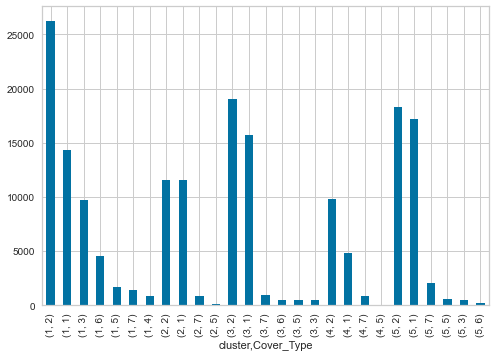

In [123]:
df_sample3.groupby('cluster')['Cover_Type'].value_counts().plot(kind='bar')
plt.show()

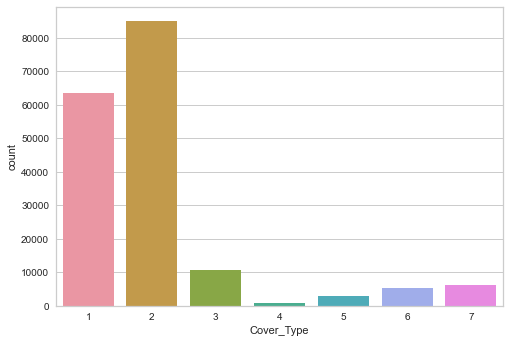

In [124]:
sns.countplot(x='Cover_Type',data=df_sample3)
plt.show()

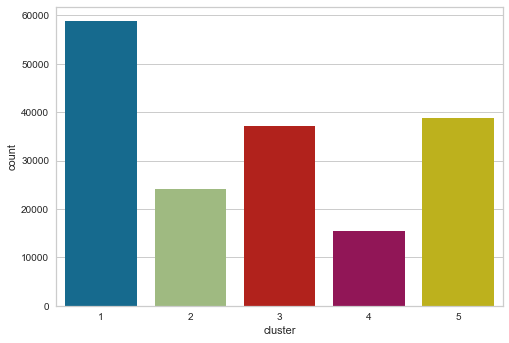

In [125]:
sns.countplot(x='cluster',data=df_sample3)
plt.show()

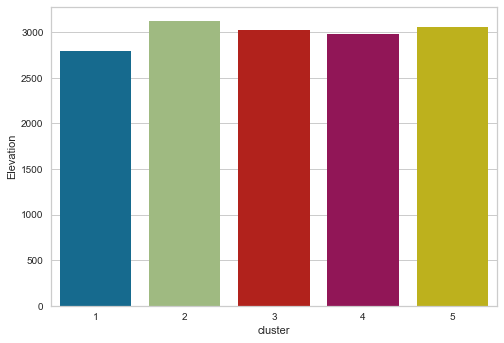

In [126]:
sns.barplot(x='cluster',y='Elevation',data=df_sample3,errwidth=0)
plt.show()

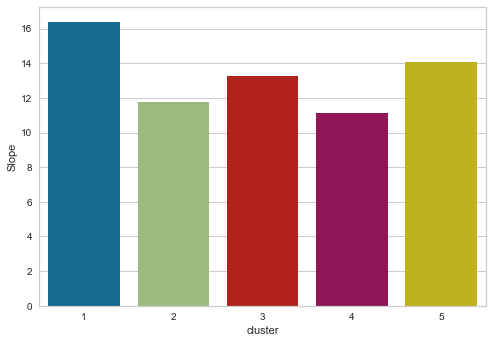

In [127]:
sns.barplot(x='cluster',y='Slope',data=df_sample3,errwidth=0)
plt.show()

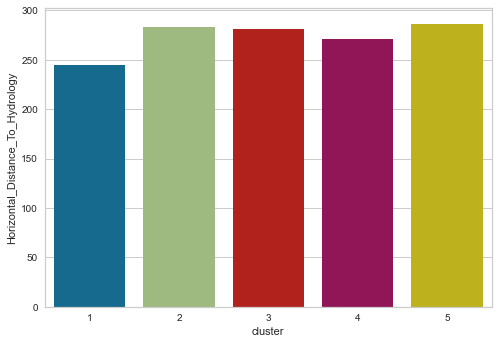

In [128]:
sns.barplot(x='cluster',y='Horizontal_Distance_To_Hydrology',data=df_sample3,errwidth=0)
plt.show()

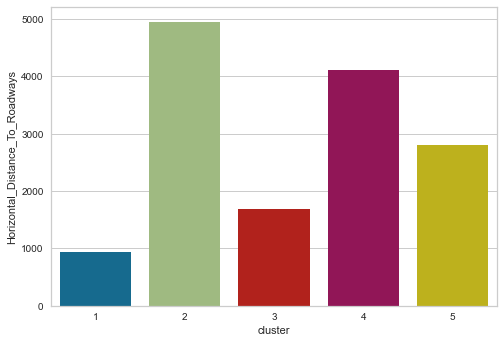

In [129]:
sns.barplot(x='cluster',y='Horizontal_Distance_To_Roadways',data=df_sample3,errwidth=0)
plt.show()

Observations:
1. Cluster3 has maximum number of trees.
2. The average height of the trees in Cluster2 is the highest whereas it is lowest for Cluster3.
3. The slope is highest for Cluster3 while is lowest for Cluster2, which means Cluster3 has more soil inclination whereas cluster2 is a fair flat soil.
4. Cluster3 is the nearest to water source while Cluster2 is farthest from the water source.
5. Cluster2 is the nearest to the roads whereas Cluster3 is deep inside and farthest from the roads.

In [106]:
df_sample3.groupby('Wilderness_Area')['Cover_Type'].value_counts()

Wilderness_Area  Cover_Type
1                2             43694
                 1             31701
                 7              1514
                 5              1159
2                1              5613
                 2              2661
                 7               692
3                2             37670
                 1             26238
                 3              4267
                 7              3947
                 6              2284
                 5              1689
4                3              6459
                 6              2926
                 2               965
                 4               824
Name: Cover_Type, dtype: int64

In [107]:
df_sample3.groupby('cluster')['Wilderness_Area'].value_counts()

cluster  Wilderness_Area
1        3                  29005
         1                  13469
         4                  11174
         2                   5169
2        1                  21574
         3                   2493
3        3                  17368
         1                  16029
         2                   3703
4        3                  26428
         1                  12264
         2                     93
5        1                  14732
         3                    801
         2                      1
Name: Wilderness_Area, dtype: int64

In [108]:
df_forest.Wilderness_Area.value_counts()

1    260796
3    253364
4     36968
2     29884
Name: Wilderness_Area, dtype: int64

In [109]:
df_sample3.Wilderness_Area.value_counts()

1    78068
3    76095
4    11174
2     8966
Name: Wilderness_Area, dtype: int64

In [110]:
Observations:
1.Krummholz are fairly found in almost all Wilderness Area
2.If one sees many Spruce/Fir or Lodgepine Pine trees, then he is in Rawah or Comanche Peak Wilderness Area, since these have a lot of Fir and Pine trees
3.Douglas-fir are found in Comanche Peak Wilderness Area and Cache la Poudre Wilderness Area
4.Cottonwood/Willow trees are found only in the Cache la Poudre Wilderness Area
5.Cache la Poudre Wilderness Area is farthest from the roads and closest to the hydrology, since it is categorized under cluster3

SyntaxError: invalid syntax (1846976263.py, line 1)